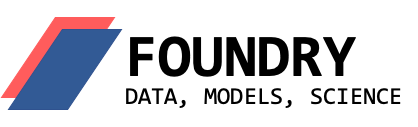

# Foundry Atom Position Finding Tutorial for Beginners
This introduction uses Foundry to:


1.   Load HDF5 data from Foundry
2.   Visualize data inputs and outputs

This notebook is set up to run as a [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) notebook, which allows you to run python code in the browser, or as a [Jupyter](https://jupyter.org/) notebook, which runs locally on your machine.

The code in the next cell will detect your environment to make sure that only cells that match your environment will run.

In [ ]:
try:
  import google.colab
  no_local_server=True
  no_browser=True
  globus=False
except: # when not in google colab
  no_local_server=False
  no_browser=False
  globus=True

# Installing Foundry
First we'll need to install Foundry. We'll also be installing [Matplotlib](https://matplotlib.org/) for our visualizations. If you're using Google Colab, this code block will install this package into the Colab environment.


If you are running locally, it will install this module onto your machine if you do not already have it. We also have a [requirements file](https://github.com/MLMI2-CSSI/foundry/tree/main/examples/atom-position-finding) included with this notebook. You can run `pip install -r requirements.txt` in your terminal to set up your environment locally.

In [ ]:
!pip install foundry_ml
!pip install matplotlib

#if in Google Colab, install these pinned versions
#since Colab keeps theirs a few verions behind
!pip install pandas==1.2.2 tables==3.6.1

# Importing Packages
Now we can import Foundry and Matplotlib so we can import the data and visualize it.

In [ ]:
from foundry import Foundry
import matplotlib.pyplot as plt 

# Instantiating Foundry
To instantiate Foundry, you'll need a [Globus](https://www.globus.org) account. Once you have your account, you can instantiate Foundry using the code below. When you instantiate Foundry locally, be sure to have your Globus endpoint turned on (you can do that with [Globus Connect Personal](https://www.globus.org/globus-connect-personal)). When you instantiate Foundry on Google Colab, you'll be given a link in the cell's output and asked to enter the provided auth code.

In [ ]:
f = Foundry(index="mdf", no_local_server=no_local_server, no_browser=no_browser)

In [ ]:
dataset_doi = '10.18126/e73h-3w6n'

# download the data 
f.load(dataset_doi, download=True, globus=globus)

In [ ]:
# load the HDF5 image data into a local object
res = f.load_data()
res

In [ ]:
# using the 'train' split, 'input' or 'target' type, and Foundry Keys specified by the dataset publisher
# we can grab the atom images, metadata, and coorinates we desire
imgs = res['train']['input']['imgs']
desc = res['train']['input']['metadata']
coords = res['train']['target']['coords']

In [ ]:
n_images = 3
offset = 150
key_list = list(res['train']['input']['imgs'].keys())[0+offset:n_images+offset]

fig, axs = plt.subplots(1, n_images, figsize=(20,20))
for i in range(n_images):
    axs[i].imshow(imgs[key_list[i]])
    axs[i].scatter(coords[key_list[i]][:,0], coords[key_list[i]][:,1], s = 20, c = 'r', alpha=0.5)